In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터 구성하기

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv('../Data/3. Big Data 분석/Concrete.csv')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
# 결측값 확인
df_raw.isnull().sum()

CEMENT                           0
BLAST_FURNACE_SLAG               0
FLY_ASH                          0
WATER                            0
SUPERPLASTICIZER                 0
COARSE_AGGREGATE                 0
FINE_AGGREGATE                   0
AGE                              0
CONCRETE_COMPRESSIVE_STRENGTH    0
dtype: int64

In [4]:
# 요약 통계량 확인
df_raw.describe()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# 이상치 처리

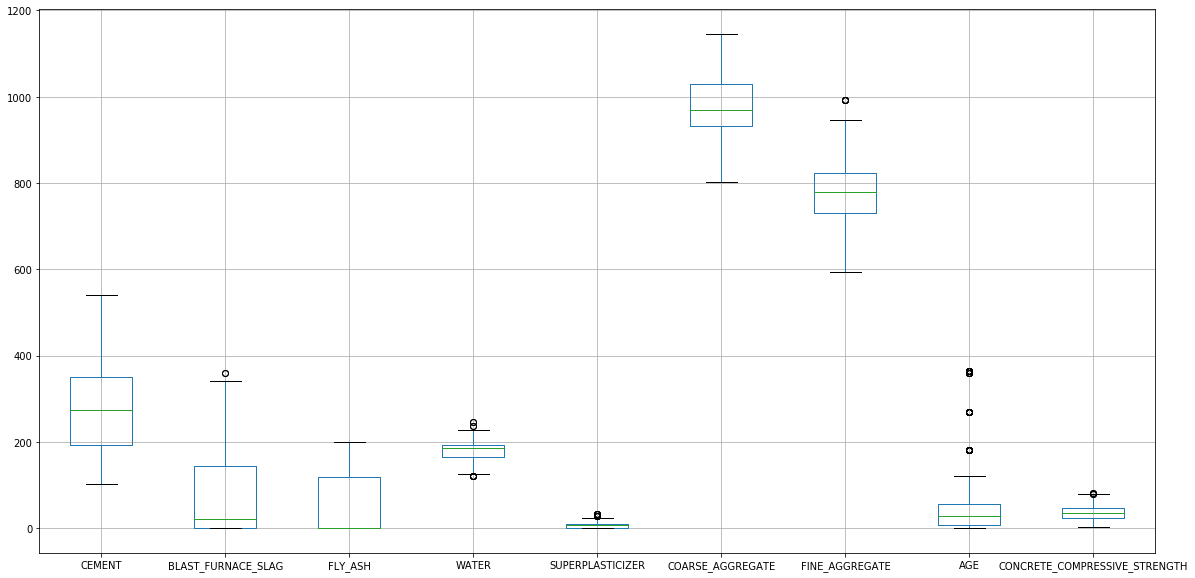

In [5]:
# boxplot으로 이상치 확인
pd.plotting.boxplot(df_raw, figsize=(20,10))

In [6]:
df_raw.sort_values('AGE', ascending=False)

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
622,307.0,0.0,0.0,193.0,0.0,968.0,812.0,365,36.15
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
56,475.0,0.0,0.0,228.0,0.0,932.0,594.0,365,41.93
610,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
42,237.5,237.5,0.0,228.0,0.0,932.0,594.0,365,39.00
...,...,...,...,...,...,...,...,...,...
214,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,3,9.45
605,236.0,0.0,0.0,194.0,0.0,968.0,885.0,3,6.47
319,249.1,0.0,98.8,158.1,12.8,987.8,889.0,3,15.36
763,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1,6.27


boxplot 상 AGE에 이상치가 있어보이지만 최대값이 365로 통일된 것으로 보아 분산이 큰 데이터로 판단됨 -> 이상치 처리 안함

# 변수 간의 경향성 파악 : 그래프 분석

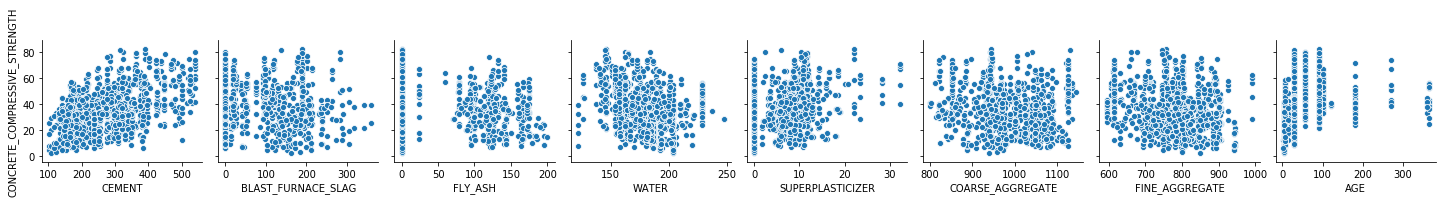

In [6]:
# y변수와 x변수들 간의 산점도 확인
sns.pairplot(df_raw, y_vars = "CONCRETE_COMPRESSIVE_STRENGTH", x_vars = df_raw.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1).columns)

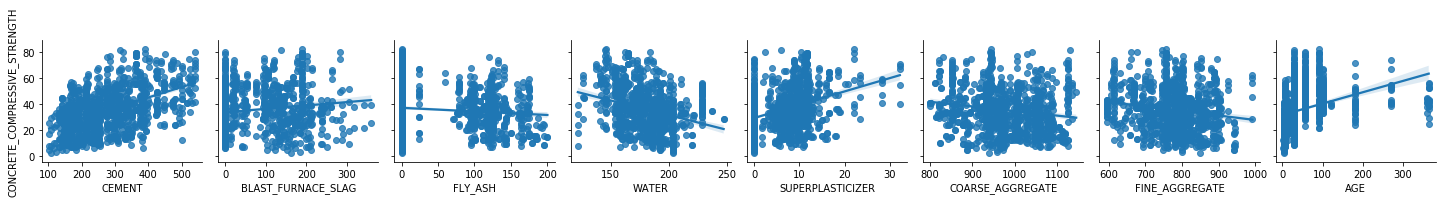

In [7]:
# y변수와 x변수들 간의 산점도 확인2
sns.pairplot(df_raw, y_vars = "CONCRETE_COMPRESSIVE_STRENGTH", x_vars = df_raw.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1).columns, kind='reg')

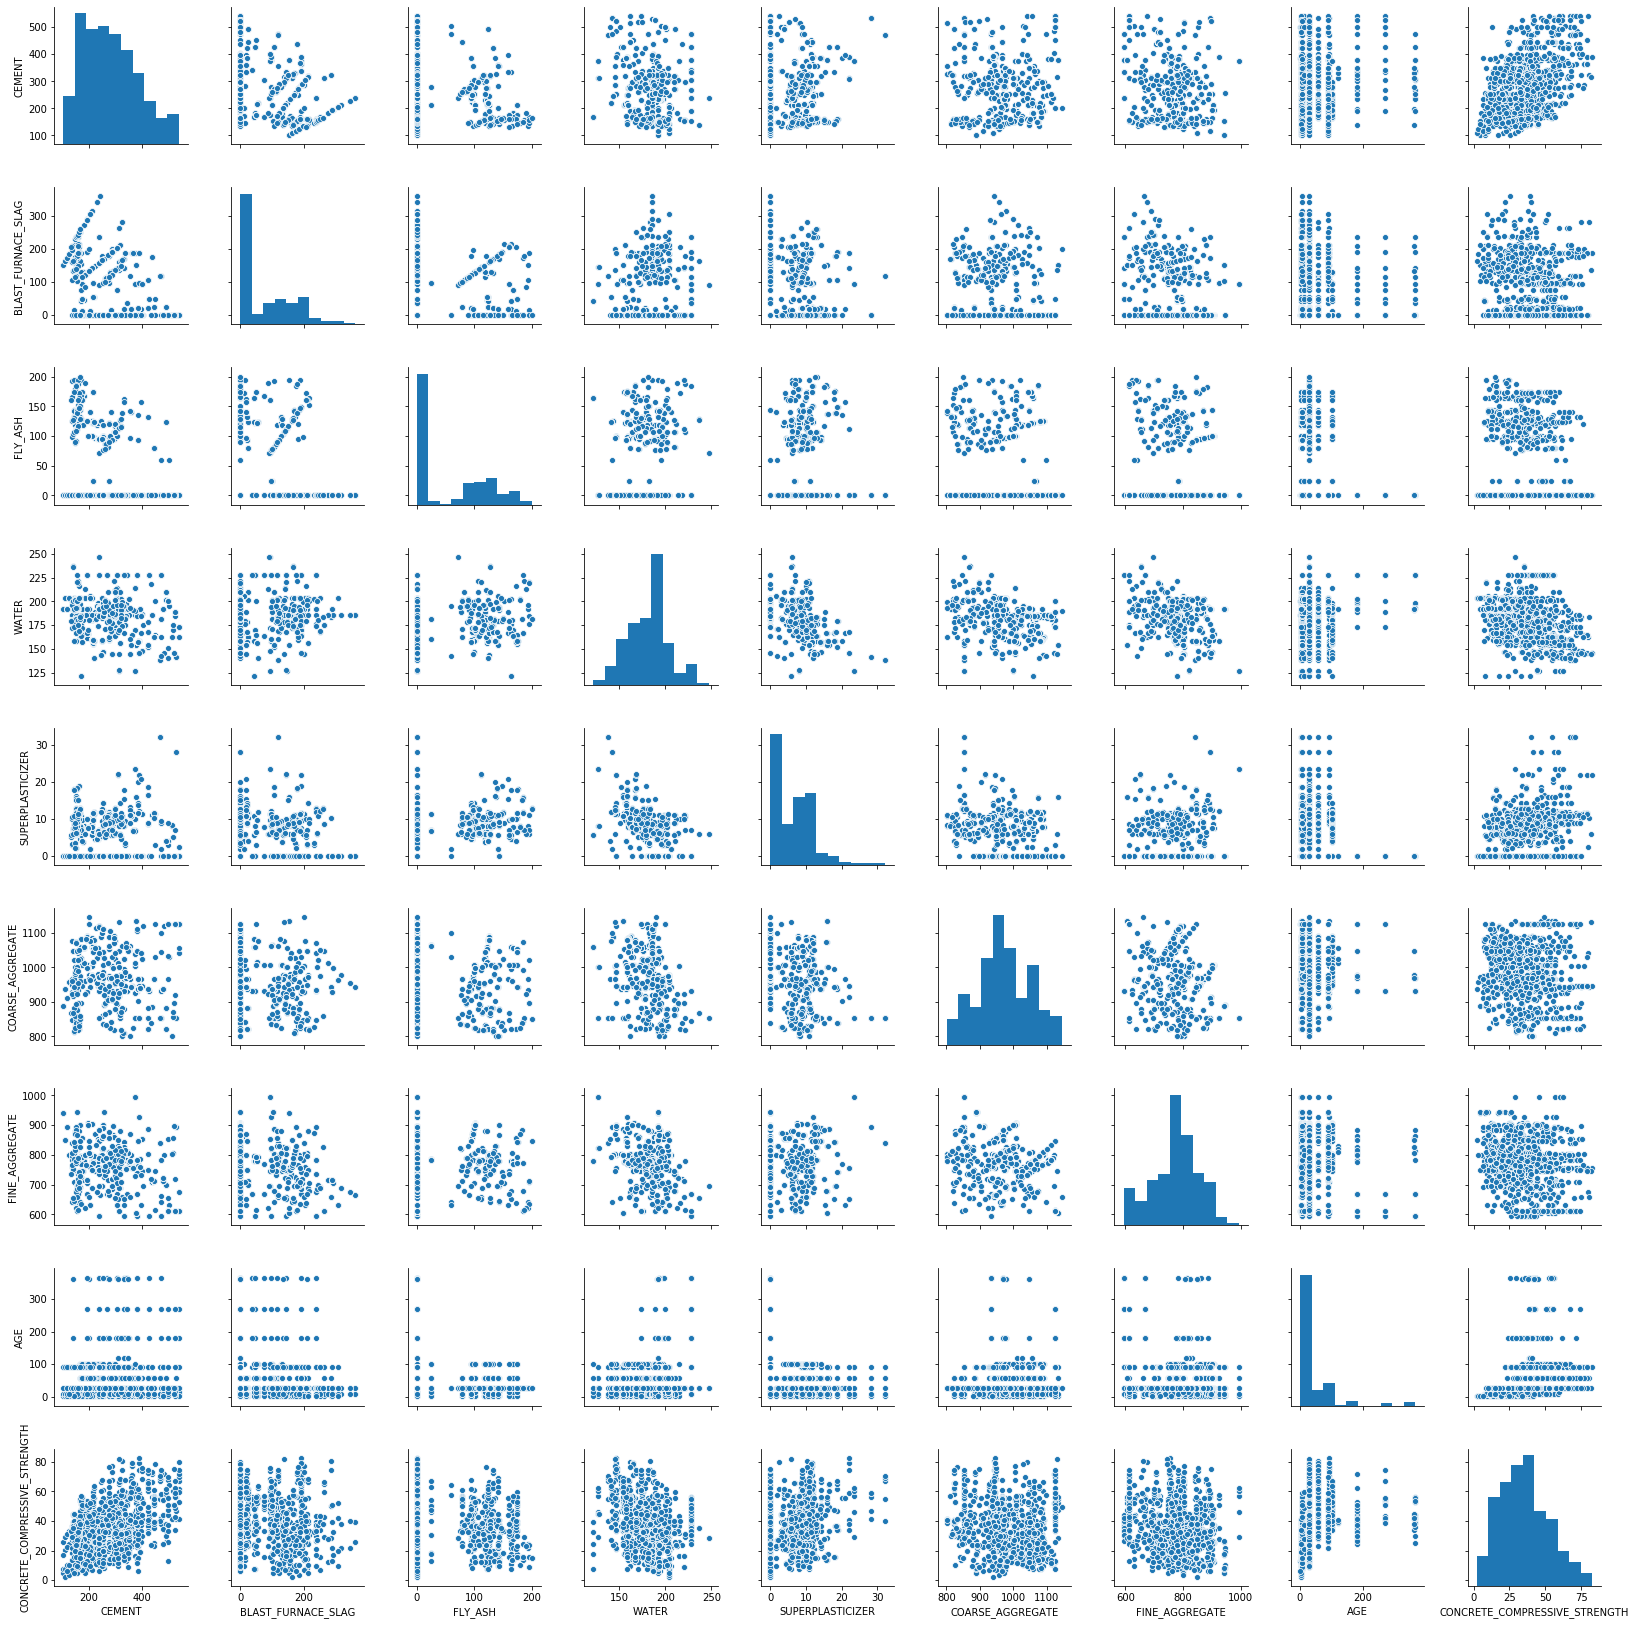

In [8]:
# 각 변수들 간의 산점도 확인
sns.pairplot(df_raw)

In [9]:
# 변수들 간 상관 분석
df_raw.corr().round(3)

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
CEMENT,1.000,-0.275,-0.397,-0.082,0.092,-0.109,-0.223,0.082,0.498
BLAST_FURNACE_SLAG,-0.275,1.000,-0.324,0.107,0.043,-0.284,-0.282,-0.044,0.135
FLY_ASH,-0.397,-0.324,1.000,-0.257,0.378,-0.010,0.079,-0.154,-0.106
WATER,-0.082,0.107,-0.257,1.000,-0.658,-0.182,-0.451,0.278,-0.290
SUPERPLASTICIZER,0.092,0.043,0.378,-0.658,1.000,-0.266,0.223,-0.193,0.366
COARSE_AGGREGATE,-0.109,-0.284,-0.010,-0.182,-0.266,1.000,-0.178,-0.003,-0.165
FINE_AGGREGATE,-0.223,-0.282,0.079,-0.451,0.223,-0.178,1.000,-0.156,-0.167
AGE,0.082,-0.044,-0.154,0.278,-0.193,-0.003,-0.156,1.000,0.329
CONCRETE_COMPRESSIVE_STRENGTH,0.498,0.135,-0.106,-0.290,0.366,-0.165,-0.167,0.329,1.000


CONCRETE_COMPRESSIVE_STRENGTH와 가장 상관관계가 높은 변수 3가지는 CEMENT, SUPERPLASTICIZER, AGE이다.

# 모델 생성

In [10]:
# 모델 생성
dt = DecisionTreeRegressor(random_state=123)
rf = RandomForestRegressor(random_state=123)
gb = GradientBoostingRegressor(random_state=123)

dt_random = DecisionTreeRegressor(random_state=123)
rf_random = RandomForestRegressor(random_state=123)
gb_random = GradientBoostingRegressor(random_state=123)

In [11]:
# 학습 데이터 분리
x = df_raw.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1)
y = df_raw['CONCRETE_COMPRESSIVE_STRENGTH']

In [12]:
# train 0.4 / validation 0.3 / test 0.3으로 나누어 주기
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.4, random_state=4132)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size=0.5, random_state=4132)

In [13]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(412, 8)
(309, 8)
(309, 8)


# 모델 학습

## 기본 모델 학습

In [14]:
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## RandomizedSearch 모델 학습

### DecisionTree 파라미터 설정

In [15]:
dt_params = dict()

dt_params['criterion'] = ['mse', 'mae']
dt_params['max_depth'] = [i for i in range(2, 21, 2)]
dt_params['min_samples_leaf'] = [i for i in range(1, 20, 2)]
dt_params['min_samples_split'] = [i for i in range(2, 41, 4)]

### RandomForest 파라미터 설정

In [16]:
rf_params = dict()

rf_params['n_estimators'] = [i for i in range(100, 1001, 100)]
rf_params['criterion'] = ['mse', 'mae']
rf_params['max_depth'] = [i for i in range(2, 21, 2)]
rf_params['min_samples_leaf'] = [i for i in range(1, 20, 2)]
rf_params['min_samples_split'] = [i for i in range(2, 41, 4)]

### GradientBoosting 파라미터 설정

In [17]:
gb_params = dict()

gb_params['learning_rate'] = [1, 0.5, 0.2, 0.1, 0.05, 0.01, 0.001]
gb_params['n_estimators'] = [i for i in range(100, 1001, 100)]
gb_params['subsample'] = [i / 10 for i in range(5, 11)]
gb_params['criterion'] = ['mse', 'mae']
gb_params['max_depth'] = [i for i in range(2, 21, 2)]
gb_params['min_samples_leaf'] = [i for i in range(1, 20, 2)]
gb_params['min_samples_split'] = [i for i in range(2, 41, 4)]

In [18]:
# randomizedsearch 모델 생성
dt_randomcv = RandomizedSearchCV(dt_random, dt_params, scoring='r2', n_jobs=-1, verbose=1, n_iter=300, random_state=1234)
rf_randomcv = RandomizedSearchCV(rf_random, rf_params, scoring='r2', n_jobs=-1, verbose=1, n_iter=300, random_state=1234)
gb_randomcv = RandomizedSearchCV(gb_random, gb_params, scoring='r2', n_jobs=-1, verbose=1, n_iter=300, random_state=1234)

In [19]:
# randomizedsearch 모델 학습
dt_randomcv.fit(x_train, y_train)
rf_randomcv.fit(x_train, y_train)
gb_randomcv.fit(x_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1392 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.3s finished


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  8.0min finished


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  9.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

# 모델 평가

## 기본 모델 평가

In [20]:
# 기본 모델 성능 확인
print(f'DecisionTree train set MSE: {mean_squared_error(y_train, dt.predict(x_train))}')
print(f'DecisionTree validation set MSE: {mean_squared_error(y_val, dt.predict(x_val))}')
print()
print(f'RandomForest train set MSE: {mean_squared_error(y_train, rf.predict(x_train))}')
print(f'RandomForest validation MSE: {mean_squared_error(y_val, rf.predict(x_val))}')
print()
print(f'GradientBoosting train set MSE: {mean_squared_error(y_train, gb.predict(x_train))}')
print(f'GradientBoosting validation set MSE: {mean_squared_error(y_val, gb.predict(x_val))}')
print()
print('--------------------------------------------------')
print()
print(f'DecisionTree train set MAE: {mean_absolute_error(y_train, dt.predict(x_train))}')
print(f'DecisionTree validation set MAE: {mean_absolute_error(y_val, dt.predict(x_val))}')
print()
print(f'RandomForest train set MAE: {mean_absolute_error(y_train, rf.predict(x_train))}')
print(f'RandomForest validation set MAE: {mean_absolute_error(y_val, rf.predict(x_val))}')
print()
print(f'GradientBoosting train set MAE: {mean_absolute_error(y_train, gb.predict(x_train))}')
print(f'GradientBoosting validation set MAE: {mean_absolute_error(y_val, gb.predict(x_val))}')

DecisionTree train set MSE: 0.35768313106796107
DecisionTree validation set MSE: 73.09895930420711

RandomForest train set MSE: 4.958838812768067
RandomForest validation MSE: 34.29219761652121

GradientBoosting train set MSE: 10.088282533896345
GradientBoosting validation set MSE: 32.837296474999924

--------------------------------------------------

DecisionTree train set MAE: 0.06759708737864079
DecisionTree validation set MAE: 5.813511326860842

RandomForest train set MAE: 1.5701892845584837
RandomForest validation set MAE: 4.194775117506553

GradientBoosting train set MAE: 2.3824229731010935
GradientBoosting validation set MAE: 4.242177986387457


Text(0, 0.5, 'Feature')

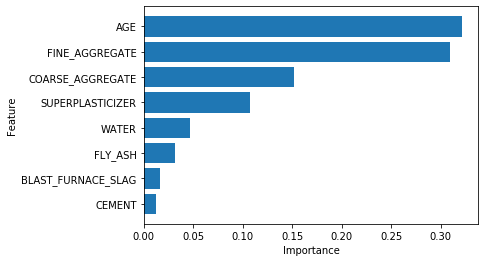

In [21]:
v_feature_name = x_train.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = dt.feature_importances_

coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=sorted(df_importance['Importance']))
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

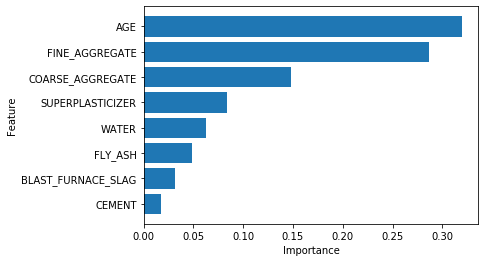

In [22]:
v_feature_name = x_train.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf.feature_importances_

coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=sorted(df_importance['Importance']))
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

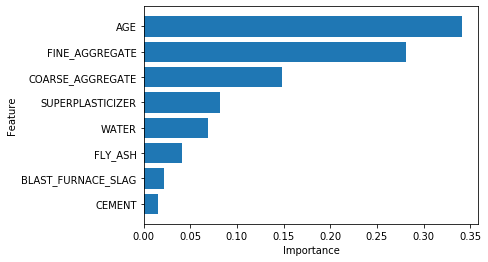

In [23]:
v_feature_name = x_train.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb.feature_importances_

coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=sorted(df_importance['Importance']))
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')

## RandomizedSearch 모델 평가

In [24]:
# randomizedsearch 모델 성능 확인
print(f'DecisionTree train set MSE: {mean_squared_error(y_train, dt_randomcv.predict(x_train))}')
print(f'DecisionTree validation set MSE: {mean_squared_error(y_val, dt_randomcv.predict(x_val))}')
print()
print(f'RandomForest train set MSE: {mean_squared_error(y_train, rf_randomcv.predict(x_train))}')
print(f'RandomForest validation MSE: {mean_squared_error(y_val, rf_randomcv.predict(x_val))}')
print()
print(f'GradientBoosting train set MSE: {mean_squared_error(y_train, gb_randomcv.predict(x_train))}')
print(f'GradientBoosting validation set MSE: {mean_squared_error(y_val, gb_randomcv.predict(x_val))}')
print()
print('--------------------------------------------------')
print()
print(f'DecisionTree train set MAE: {mean_absolute_error(y_train, dt_randomcv.predict(x_train))}')
print(f'DecisionTree validation set MAE: {mean_absolute_error(y_val, dt_randomcv.predict(x_val))}')
print()
print(f'RandomForest train set MAE: {mean_absolute_error(y_train, rf_randomcv.predict(x_train))}')
print(f'RandomForest validation set MAE: {mean_absolute_error(y_val, rf_randomcv.predict(x_val))}')
print()
print(f'GradientBoosting train set MAE: {mean_absolute_error(y_train, gb_randomcv.predict(x_train))}')
print(f'GradientBoosting validation set MAE: {mean_absolute_error(y_val, gb_randomcv.predict(x_val))}')

DecisionTree train set MSE: 0.4633828883495145
DecisionTree validation set MSE: 81.66613495145631

RandomForest train set MSE: 4.961027294914691
RandomForest validation MSE: 34.20195780092813

GradientBoosting train set MSE: 1.8901256673140199
GradientBoosting validation set MSE: 26.553180210631673

--------------------------------------------------

DecisionTree train set MAE: 0.058349514563106775
DecisionTree validation set MAE: 5.809482200647249

RandomForest train set MAE: 1.5791072279650402
RandomForest validation set MAE: 4.194678486578488

GradientBoosting train set MAE: 0.9252104913008471
GradientBoosting validation set MAE: 3.51527605259098


## 결과 분석
1. 파라미터를 default로 설정하고 생성한 모델 중 DecisionTree가 train set에 대해 가장 학습을 잘 했다.  
   그러나 validation set에서의 결과는 오히려 가장 안좋은 성능을 보여준다. -> 과대적합 되었으므로 파라미터 튜닝을 통해 수정 필요
2. validation set에서 가장 좋은 성능을 내는 모델은 GradientBoosting이다.
3. randomized search cv로 인한 성능 향상이 크게 이루어지진 않았다.  
   DecisionTree의 경우 오히려 성능이 나빠졌고, RandomForest는 거의 비슷하고, GradientBoosting은 성능이 향상되었다.
4. 모델마다 변수 중요도의 크기는 약간씩 다르지만 순서는 모두 동일하다(AGE가 가장 중요하다). 

# 수동 파라미터 튜닝
수동 파라미터 튜닝은 train과 validation의 차이가 가장 큰 decisiontree만 진행한다.

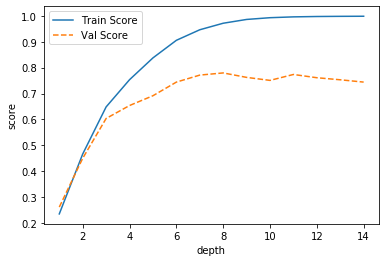

In [25]:
train_score = []
val_score = []

para_depth = [depth for depth in range(1,15)]

for depth in para_depth:
    dt = DecisionTreeRegressor(max_depth=depth,random_state=123)
    dt.fit(x_train, y_train)
    train_score.append(dt.score(x_train, y_train))
    val_score.append(dt.score(x_val, y_val))
    
plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, val_score, linestyle='--', label='Val Score')
plt.ylabel('score')
plt.xlabel('depth')
plt.legend()

In [26]:
# depth 8에서 validation score가 최대이므로 8 설정
dt = DecisionTreeRegressor(max_depth=8,random_state=123)
dt.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [28]:
print(f'DecisionTree train set MSE: {mean_squared_error(y_train, dt.predict(x_train))}')
print(f'DecisionTree validation set MSE: {mean_squared_error(y_val, dt.predict(x_val))}')
print()
print(f'DecisionTree train set MAE: {mean_absolute_error(y_train, dt.predict(x_train))}')
print(f'DecisionTree validation set MAE: {mean_absolute_error(y_val, dt.predict(x_val))}')

DecisionTree train set MSE: 8.207558315210614
DecisionTree validation set MSE: 64.08072474359918

DecisionTree train set MAE: 1.7865100494839574
DecisionTree validation set MAE: 5.687754871342251


depth만 조절해준 이유는 train set에 대해 오버피팅 되어있기 때문이다.  
아직도 train과 validation의 차이가 크긴 하지만 default값과 randomized search cv보다 성능이 잘 나왔다. 

# 최종 평가
validation set에 대해 가장 잘 나온 파라미터들로 모델을 구성하여 test set에 대해 평가한다.

In [35]:
dt_final = DecisionTreeRegressor(max_depth=8, random_state=1234)
rf_final = RandomForestRegressor(random_state=1234, **rf_randomcv.best_params_)
gb_final = GradientBoostingRegressor(random_state=1234, **gb_randomcv.best_params_)

In [36]:
dt_final.fit(x_train, y_train)
rf_final.fit(x_train, y_train)
gb_final.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=34,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
# 최종 성능 확인
print(f'DecisionTree test set MSE: {mean_squared_error(y_test, dt_final.predict(x_test))}')
print(f'DecisionTree test set MAE: {mean_absolute_error(y_test, dt_final.predict(x_test))}')
print(f'DecisionTree test set R2: {dt_final.score(x_test, y_test)}')
print()
print(f'RandomForest test set MSE: {mean_squared_error(y_test, rf_final.predict(x_test))}')
print(f'RandomForest test set MAE: {mean_absolute_error(y_test, rf_final.predict(x_test))}')
print(f'RandomForest test set R2: {rf_final.score(x_test, y_test)}')
print()
print(f'GradientBoosting test set MSE: {mean_squared_error(y_test, gb_final.predict(x_test))}')
print(f'GradientBoosting test set MAE: {mean_absolute_error(y_test, gb_final.predict(x_test))}')
print(f'GradientBoosting test set R2: {gb_final.score(x_test, y_test)}')

DecisionTree test set MSE: 58.90704475167679
DecisionTree test set MAE: 5.601941999747824
DecisionTree test set R2: 0.765464582818995

RandomForest test set MSE: 31.64930903739041
RandomForest test set MAE: 4.059858719919728
RandomForest test set R2: 0.8739898779532033

GradientBoosting test set MSE: 27.19317877606686
GradientBoosting test set MAE: 3.4235010759944164
GradientBoosting test set R2: 0.8917317350478535


Text(0, 0.5, 'Feature')

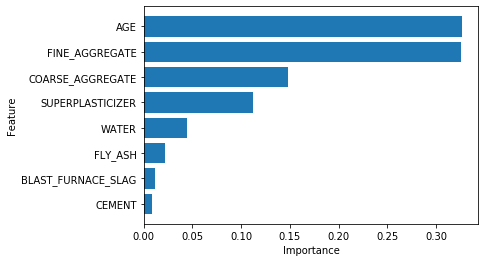

In [40]:
v_feature_name = x_train.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = dt_final.feature_importances_

coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=sorted(df_importance['Importance']))
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

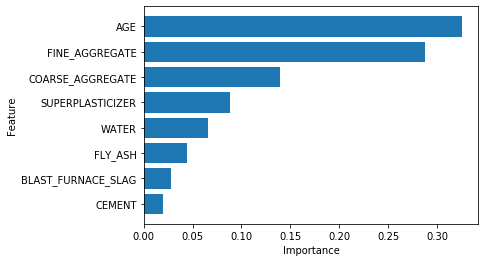

In [41]:
v_feature_name = x_train.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=sorted(df_importance['Importance']))
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')

Text(0, 0.5, 'Feature')

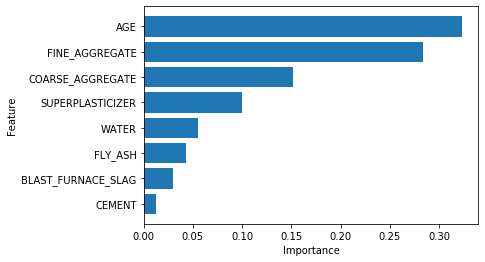

In [42]:
v_feature_name = x_train.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=sorted(df_importance['Importance']))
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')

# 결론
1. 3가지 모델 중 test set에 대해 가장 성능이 높은 것은 GradientBoosting 모델이다.
2. 앙상블 기법이 아닌 DecisionTree 모델로도 결정계수가 0.76이 나오는 것을 보아 잘 정제된 데이터로 파악된다.